<a href="https://colab.research.google.com/github/source-droid/Machine-Learning-based-Automatic-Covid-19-detection-using-Lung-s-Scans/blob/main/Wavelet_Binary_class_model_s256_tr1000_ts_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libaries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
import random
import pywt
import pywt.data
from tensorflow.keras.utils import to_categorical

import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

## Clone Dataset

In [2]:
# Cloning Dataset on Colab
! git clone https://github.com/source-droid/This-is-splitted-for-COVID-and-NORMAL-Only.git

Cloning into 'This-is-splitted-for-COVID-and-NORMAL-Only'...
remote: Enumerating objects: 3013, done.
remote: Total 3013 (delta 0), reused 0 (delta 0), pack-reused 3013
Receiving objects: 100% (3013/3013), 1.71 GiB | 31.58 MiB/s, done.
Checking out files: 100% (3005/3005), done.


# Reading the Training images


In [2]:
size = 256

In [3]:
#Reading Training Images For Covid and Normal
import numpy as np 
import glob 
import cv2 
path_l = glob.glob("/content/This-is-splitted-for-COVID-and-NORMAL-Only/train/Covid/*.*")
cv_img = []
for img in path_l:
    n = cv2.imread(img)
    
    n = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # converting image Into Grayscale for Wavelet 
    # as opencv loads in BGR format by default, we want to show it in Grayscale.

    coeffs2 = pywt.dwt2(n, 'db3', mode = 'periodization') # 1 level DWT. Applying wavelet
    cA, (cH, cV, cD) = coeffs2 # Extracting coeff2.
 
    n = cv2.resize(cA,(size,size))
    cv_img.append(n) 


arrayl = np.asarray(cv_img[0:500])
arrayl = np.stack([arrayl, arrayl, arrayl], axis=-1) # Stack of Data to make RGB
print(arrayl.shape) 

path_2 = glob.glob("/content/This-is-splitted-for-COVID-and-NORMAL-Only/train/Normal/*.*")
cv_img = []
for img in path_2:
    n = cv2.imread(img)
    
    n = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # converting image Into Grayscale for Wavelet 
    # as opencv loads in BGR format by default, we want to show it in Grayscale.

    coeffs2 = pywt.dwt2(n, 'db3', mode = 'periodization') # 1 level DWT. Applying wavelet
    cA, (cH, cV, cD) = coeffs2 # Extracting coeff2.

    n = cv2.resize(cA,(size,size))
    cv_img.append(n) 

array2 = np.asarray(cv_img[0:500]) 
array2 = np.stack([array2, array2, array2], axis=-1) # Stack of Data to make RGB
print(array2.shape) 

(500, 256, 256, 3)
(500, 256, 256, 3)


# Reading the Testing images


In [4]:
# Reading Testing Images For Covid and Normal
import numpy as np 
import glob
import cv2 

path_l = glob.glob("/content/This-is-splitted-for-COVID-and-NORMAL-Only/test/Covid/*.*") 
cv_img = [] 
for img in path_l:
    n = cv2.imread(img)
    
    n = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # converting image Into Grayscale for Wavelet 
    # as opencv loads in BGR format by default, we want to show it in Grayscale.

    coeffs2 = pywt.dwt2(n, 'db3', mode = 'periodization') # 1 level DWT. Applying wavelet
    cA, (cH, cV, cD) = coeffs2 # Extracting coeff2.
    n = cv2.resize(cA,(size,size))
    cv_img.append(n) 

array3 = np.asarray(cv_img[0:50]) 
array3 = np.stack([array3, array3, array3], axis=-1) # Stack of Data to make RGB
print(array3.shape) 

path_2 = glob.glob("/content/This-is-splitted-for-COVID-and-NORMAL-Only/test/Normal/*.*") 
cv_img = []
for img in path_2:
    n = cv2.imread(img)
    
    n = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # converting image Into Grayscale for Wavelet 
    # as opencv loads in BGR format by default, we want to show it in Grayscale.


    coeffs2 = pywt.dwt2(n, 'db3', mode = 'periodization') # 1 level DWT. Applying wavelet
    cA, (cH, cV, cD) = coeffs2 # Extracting coeff2.
    n = cv2.resize(cA,(size,size))
    cv_img.append(n) 

array4 = np.asarray(cv_img[0:50])
array4 = np.stack([array4, array4, array4], axis=-1) # Stack of Data to make RGB
print(array4.shape) 


(50, 256, 256, 3)
(50, 256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


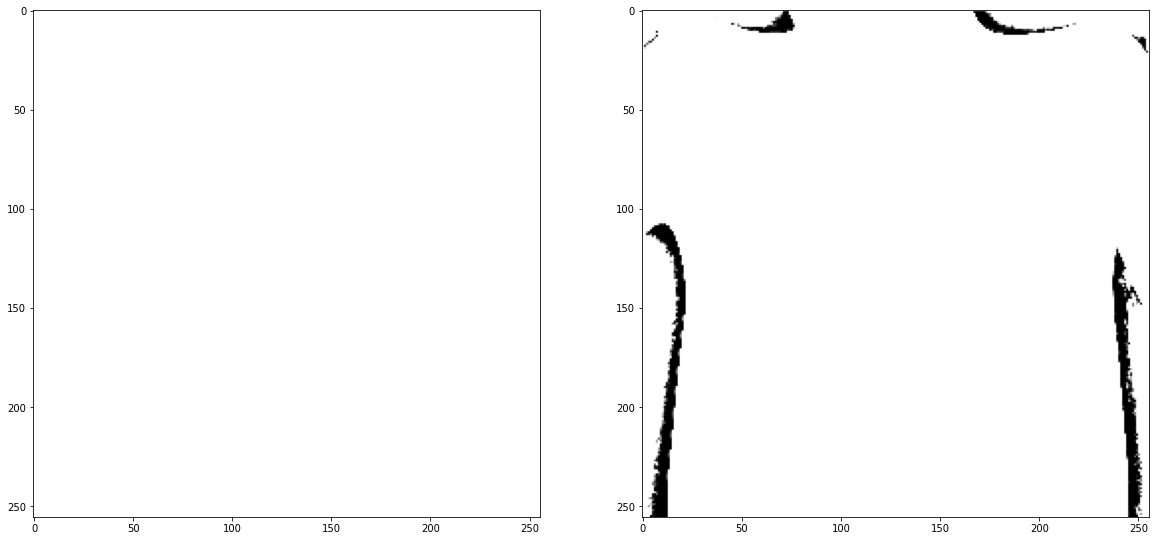

In [9]:
matplotlib.pyplot.figure(num=None, figsize=[20,10])
plt.subplot(121),plt.imshow(arrayl[4])
plt.subplot(122),plt.imshow(array2[6])
plt.show()

# Concatenating Covid and Normal arrays into one variable for train and test:

In [5]:
# Concatenating Covid and Normal arrays into one variable for train and test:
Xtrain = np.concatenate((arrayl,array2))

Xtest = np.concatenate((array3,array4))

Xtrain.shape , Xtest.shape 

((1000, 256, 256, 3), (100, 256, 256, 3))

# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for training data:

In [6]:
# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for training data:

labels0 = np.zeros(len(arrayl)) 
labels1 = np.ones(len(array2)) 
print('Normal labels : ',labels0 ,'Covid labels : ', labels1) 
len(labels0) , len(labels1) 


Normal labels :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

(500, 500)

# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for testing data:

In [7]:
# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for testing data:

labels0s = np.zeros(len(array3)) 
labels1s = np.ones(len(array4)) 
print('Normal labels : ',labels0s ,'Covid labels : ', labels1s) 
len(labels0s) , len(labels1s) 

Normal labels :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] Covid labels :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


(50, 50)

# Concatenating the labels for Covid and Normal for training and testing:

In [8]:
# Concatenating the labels for Covid and Normal for training and testing:
ytrain = np.concatenate((labels0,labels1)) 
ytest = np.concatenate((labels0s,labels1s)) 
ytrain.shape, ytest.shape 


((1000,), (100,))

# Splitting the dataset for validation data:

In [9]:
# Splitting the dataset for validation data:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(Xtrain,ytrain,test_size = 0.2, shuffle = True) 
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape 


((800, 256, 256, 3), (200, 256, 256, 3), (800,), (200,))

# Normalizing the data from 0 to 255 to 0 to 1:

In [10]:
# Normalizing the data from 0 to 255 to 0 to 1:
X_train_norm = X_train/255 
X_valid_norm = X_valid/255
Xtest_norm = Xtest/255 


In [16]:
X_train_norm.shape

(800, 256, 256, 3)

## Building the Model

## 2 convolutional layers

In [17]:
# Model With Dropout Layer


model = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
model.add(Conv2D(32,(5,5),padding = 'SAME', activation = 'relu', input_shape = (size,size,3)))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
model.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())

# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0

## 3 convolutional layers

In [18]:
# Model With Dropout Layer


model2 = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
model2.add(Conv2D(32,(5,5),padding = 'SAME', activation = 'relu', input_shape = (size,size,3)))

# pooling layer
model2.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model2.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
model2.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
model2.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model2.add(Dropout(0.5))

# add another convolutional layer
model2.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
model2.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model2.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model2.add(Flatten())

# add a dense layer : amount of nodes, activation
model2.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
model2.add(Dropout(0.5))
model2.add(Dense(1, activation = 'sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 256, 256, 32)      2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)       

## 4 convolutional layers

In [19]:
# Model With Dropout Layer


model3 = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
model3.add(Conv2D(32,(5,5),padding = 'SAME', activation = 'relu', input_shape = (size,size,3)))

# pooling layer
model3.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model3.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
model3.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
model3.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model3.add(Dropout(0.5))

# add another convolutional layer
model3.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
model3.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model3.add(Dropout(0.5))

# add another convolutional layer
model3.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
model3.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model3.add(Dropout(0.5))


# Flatten the image to 1 dimensional array
model3.add(Flatten())

# add a dense layer : amount of nodes, activation
model3.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
model3.add(Dropout(0.5))
model3.add(Dense(1, activation = 'sigmoid'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 256, 256, 32)      2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 64)      51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)       

## 5 convolutional layers

In [20]:
# Model With Dropout Layer


model4 = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
model4.add(Conv2D(32,(5,5),padding = 'SAME', activation = 'relu', input_shape = (size,size,3)))

# pooling layer
model4.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model4.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
model4.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
model4.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model4.add(Dropout(0.5))

# add another convolutional layer
model4.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
model4.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model4.add(Dropout(0.5))

# add another convolutional layer
model4.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
model4.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model4.add(Dropout(0.5))


# Flatten the image to 1 dimensional array
model4.add(Flatten())

# add a dense layer : amount of nodes, activation
model4.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
model4.add(Dropout(0.5))
model4.add(Dense(1, activation = 'sigmoid'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 256, 256, 32)      2432      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 64)      51264     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)       

## Compile The Model

In [21]:
# compile model
from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
model.compile(Adam(lr = 0.001),loss = 'binary_crossentropy', metrics = ['accuracy'])
model2.compile(Adam(lr = 0.001),loss = 'binary_crossentropy', metrics = ['accuracy'])
model3.compile(Adam(lr = 0.001),loss = 'binary_crossentropy', metrics = ['accuracy'])
model4.compile(Adam(lr = 0.001),loss = 'binary_crossentropy', metrics = ['accuracy'])


## Train the Model

In [22]:
# train the model
%%time
model_history = model.fit(X_train_norm,y_train,epochs = 30,validation_data=(X_valid_norm,y_valid),verbose = 1)

Epoch 1/30
25/25 [==============================] - 37s 117ms/step - loss: 17.4289 - accuracy: 0.6061 - val_loss: 0.4317 - val_accuracy: 0.9750
Epoch 2/30
25/25 [==============================] - 2s 92ms/step - loss: 0.1659 - accuracy: 0.9299 - val_loss: 0.3913 - val_accuracy: 0.9750
Epoch 3/30
25/25 [==============================] - 2s 91ms/step - loss: 0.1894 - accuracy: 0.9378 - val_loss: 0.2478 - val_accuracy: 0.9900
Epoch 4/30
25/25 [==============================] - 2s 92ms/step - loss: 0.0971 - accuracy: 0.9702 - val_loss: 0.2166 - val_accuracy: 0.9600
Epoch 5/30
25/25 [==============================] - 2s 92ms/step - loss: 0.0816 - accuracy: 0.9660 - val_loss: 0.1718 - val_accuracy: 0.9350
Epoch 6/30
25/25 [==============================] - 2s 92ms/step - loss: 0.1704 - accuracy: 0.9515 - val_loss: 0.3250 - val_accuracy: 0.9400
Epoch 7/30
25/25 [==============================] - 2s 92ms/step - loss: 0.1560 - accuracy: 0.9512 - val_loss: 0.2023 - val_accuracy: 0.9900
Epoch 8/30

In [23]:
# train the model
%%time
model_history2 = model2.fit(X_train_norm,y_train,epochs = 30,validation_data=(X_valid_norm,y_valid),verbose = 1)

Epoch 1/30
25/25 [==============================] - 4s 117ms/step - loss: 12.7823 - accuracy: 0.4657 - val_loss: 0.6932 - val_accuracy: 0.4800
Epoch 2/30
25/25 [==============================] - 2s 93ms/step - loss: 0.6881 - accuracy: 0.5111 - val_loss: 0.5563 - val_accuracy: 0.9250
Epoch 3/30
25/25 [==============================] - 2s 93ms/step - loss: 0.3672 - accuracy: 0.8924 - val_loss: 0.1501 - val_accuracy: 0.9450
Epoch 4/30
25/25 [==============================] - 2s 93ms/step - loss: 0.1998 - accuracy: 0.9244 - val_loss: 0.1465 - val_accuracy: 0.9600
Epoch 5/30
25/25 [==============================] - 2s 94ms/step - loss: 0.2158 - accuracy: 0.9234 - val_loss: 0.1131 - val_accuracy: 0.9700
Epoch 6/30
25/25 [==============================] - 2s 92ms/step - loss: 0.1380 - accuracy: 0.9559 - val_loss: 0.1329 - val_accuracy: 0.9900
Epoch 7/30
25/25 [==============================] - 2s 95ms/step - loss: 0.1165 - accuracy: 0.9623 - val_loss: 0.0839 - val_accuracy: 0.9850
Epoch 8/30


In [24]:
# train the model
%%time
model_history3 = model3.fit(X_train_norm,y_train,epochs = 30,validation_data=(X_valid_norm,y_valid),verbose = 1)

Epoch 1/30
25/25 [==============================] - 4s 104ms/step - loss: 1.1658 - accuracy: 0.5467 - val_loss: 0.6609 - val_accuracy: 0.5650
Epoch 2/30
25/25 [==============================] - 2s 94ms/step - loss: 0.4255 - accuracy: 0.8211 - val_loss: 0.2615 - val_accuracy: 0.9700
Epoch 3/30
25/25 [==============================] - 2s 95ms/step - loss: 0.2570 - accuracy: 0.9249 - val_loss: 0.2360 - val_accuracy: 0.9700
Epoch 4/30
25/25 [==============================] - 2s 94ms/step - loss: 0.1911 - accuracy: 0.9374 - val_loss: 0.3804 - val_accuracy: 0.9150
Epoch 5/30
25/25 [==============================] - 2s 93ms/step - loss: 0.2663 - accuracy: 0.9174 - val_loss: 0.3868 - val_accuracy: 0.9450
Epoch 6/30
25/25 [==============================] - 2s 95ms/step - loss: 0.1252 - accuracy: 0.9645 - val_loss: 0.2340 - val_accuracy: 0.9650
Epoch 7/30
25/25 [==============================] - 2s 93ms/step - loss: 0.1656 - accuracy: 0.9556 - val_loss: 0.1581 - val_accuracy: 0.9800
Epoch 8/30
2

In [25]:
# train the model
%%time
model_history4 = model4.fit(X_train_norm,y_train,epochs = 30,validation_data=(X_valid_norm,y_valid),verbose = 1)

Epoch 1/30
25/25 [==============================] - 3s 105ms/step - loss: 3.6652 - accuracy: 0.4933 - val_loss: 0.6735 - val_accuracy: 0.9150
Epoch 2/30
25/25 [==============================] - 2s 94ms/step - loss: 0.5201 - accuracy: 0.8110 - val_loss: 0.3757 - val_accuracy: 0.9650
Epoch 3/30
25/25 [==============================] - 2s 94ms/step - loss: 0.3258 - accuracy: 0.8684 - val_loss: 0.2831 - val_accuracy: 0.9600
Epoch 4/30
25/25 [==============================] - 2s 93ms/step - loss: 0.2524 - accuracy: 0.9156 - val_loss: 0.3220 - val_accuracy: 0.9300
Epoch 5/30
25/25 [==============================] - 2s 94ms/step - loss: 0.2227 - accuracy: 0.9110 - val_loss: 0.2014 - val_accuracy: 0.9650
Epoch 6/30
25/25 [==============================] - 2s 94ms/step - loss: 0.1572 - accuracy: 0.9534 - val_loss: 0.3625 - val_accuracy: 0.9350
Epoch 7/30
25/25 [==============================] - 2s 94ms/step - loss: 0.1662 - accuracy: 0.9364 - val_loss: 0.0956 - val_accuracy: 0.9700
Epoch 8/30
2

# Evaluating the model

In [26]:
# Evaluating the model:
%%time
model.evaluate(Xtest_norm,ytest,verbose= 1)

4/4 [==============================] - 0s 61ms/step - loss: 0.2042 - accuracy: 0.9500
CPU times: user 230 ms, sys: 49.8 ms, total: 279 ms
Wall time: 302 ms


[0.20416390895843506, 0.949999988079071]

In [27]:
# Evaluating the model:
%%time
model2.evaluate(Xtest_norm,ytest,verbose= 1)

4/4 [==============================] - 0s 37ms/step - loss: 0.0696 - accuracy: 0.9900
CPU times: user 164 ms, sys: 26.8 ms, total: 191 ms
Wall time: 211 ms


[0.0696280226111412, 0.9900000095367432]

In [28]:
# Evaluating the model:
%%time
model3.evaluate(Xtest_norm,ytest,verbose= 1)

4/4 [==============================] - 0s 29ms/step - loss: 0.0398 - accuracy: 0.9800
CPU times: user 142 ms, sys: 15.1 ms, total: 157 ms
Wall time: 191 ms


[0.03978125751018524, 0.9800000190734863]

In [29]:
# Evaluating the model:
%%time
model4.evaluate(Xtest_norm,ytest,verbose= 1)

4/4 [==============================] - 0s 20ms/step - loss: 0.0423 - accuracy: 0.9900
CPU times: user 134 ms, sys: 5.94 ms, total: 140 ms
Wall time: 165 ms


[0.0422963872551918, 0.9900000095367432]

# Plot performance metrics

## 2 conv accuracu and loss

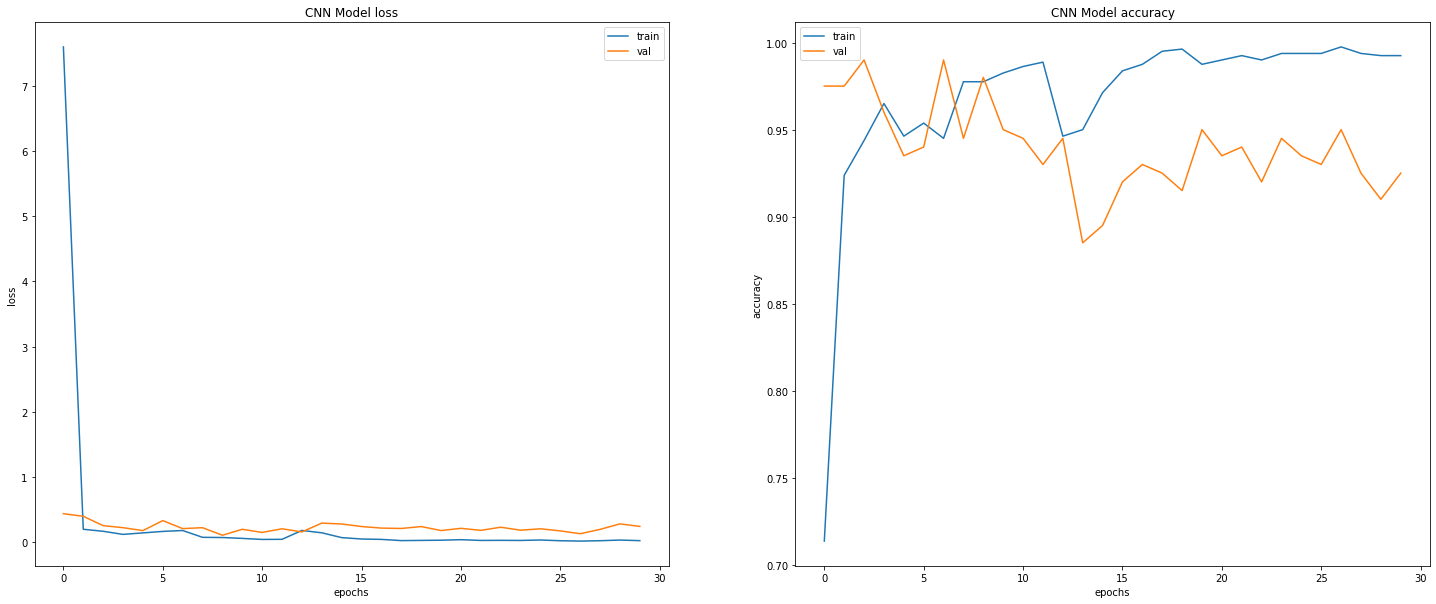

In [30]:
# plot the model accuracy and loss for the training and the validating set.
# CNN Model
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
ax = ax.ravel()

for i, met in enumerate(['loss', 'accuracy']):
    ax[i].plot(model_history.history[met])
    ax[i].plot(model_history.history['val_' + met])
    ax[i].set_title('CNN Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

## 3 conv accuracu and loss

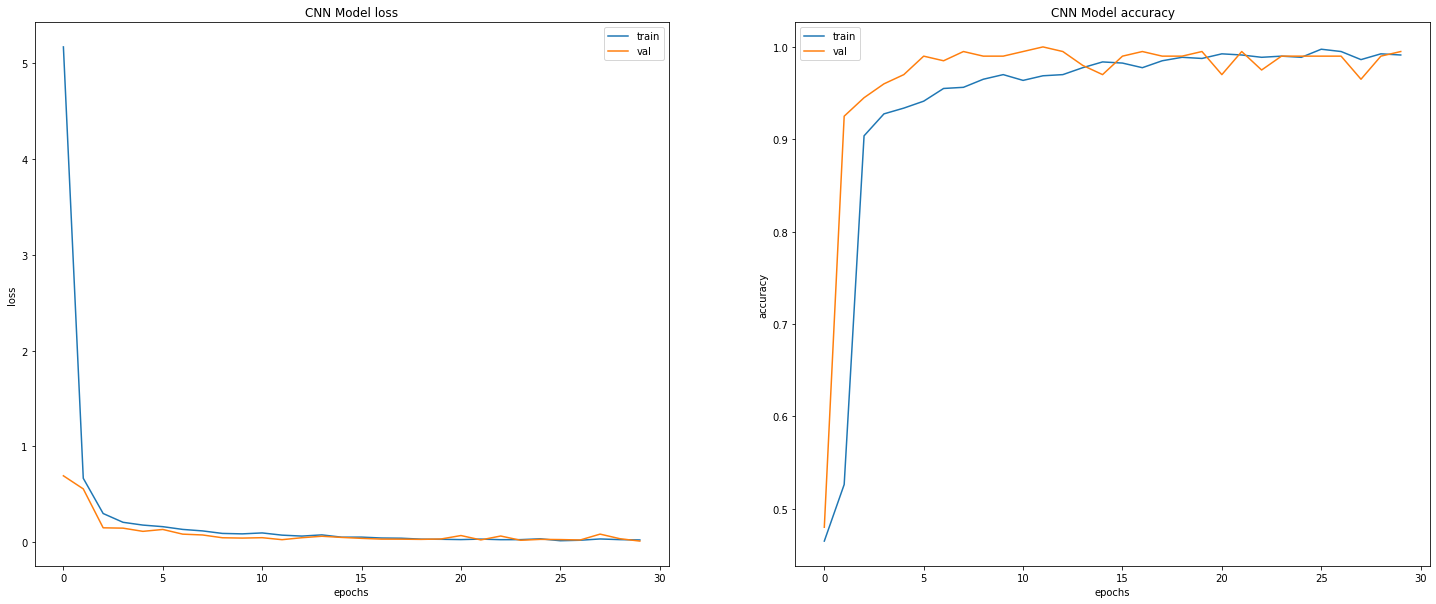

In [31]:
# plot the model accuracy and loss for the training and the validating set.
# CNN Model
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
ax = ax.ravel()

for i, met in enumerate(['loss', 'accuracy']):
    ax[i].plot(model_history2.history[met])
    ax[i].plot(model_history2.history['val_' + met])
    ax[i].set_title('CNN Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

## 4 conv accuracu and loss

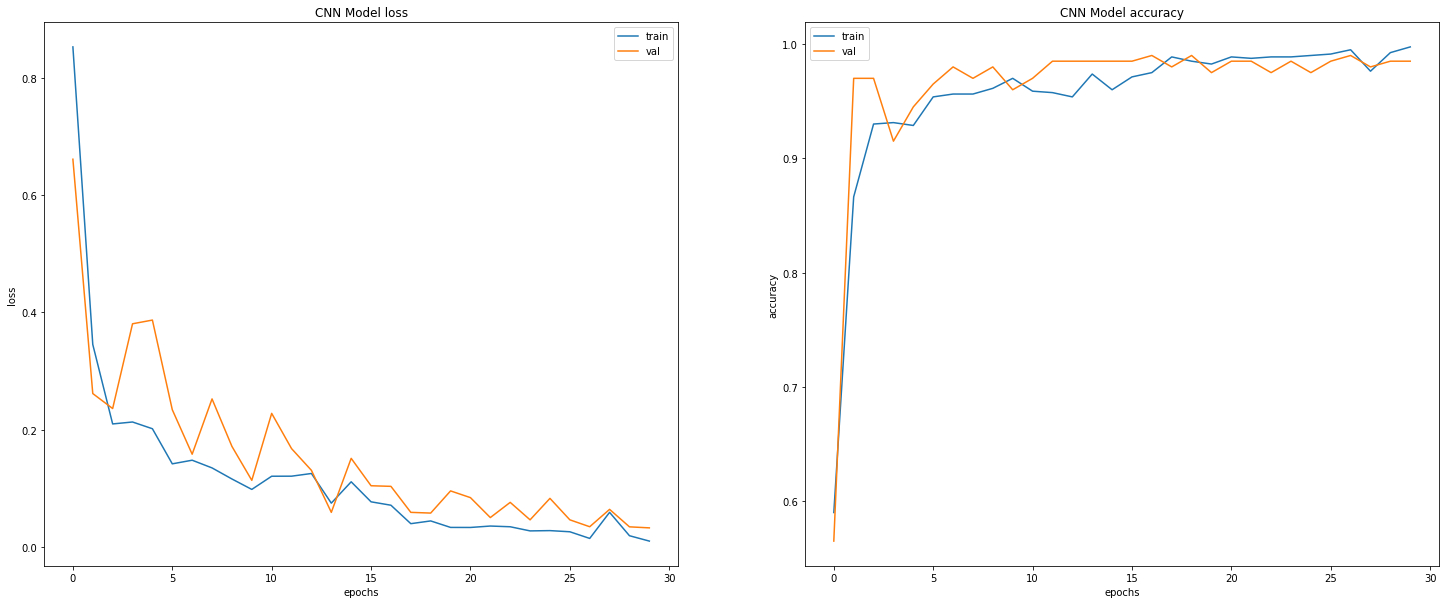

In [32]:
# plot the model accuracy and loss for the training and the validating set.
# CNN Model
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
ax = ax.ravel()

for i, met in enumerate(['loss', 'accuracy']):
    ax[i].plot(model_history3.history[met])
    ax[i].plot(model_history3.history['val_' + met])
    ax[i].set_title('CNN Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

## 5 conv accuracu and loss

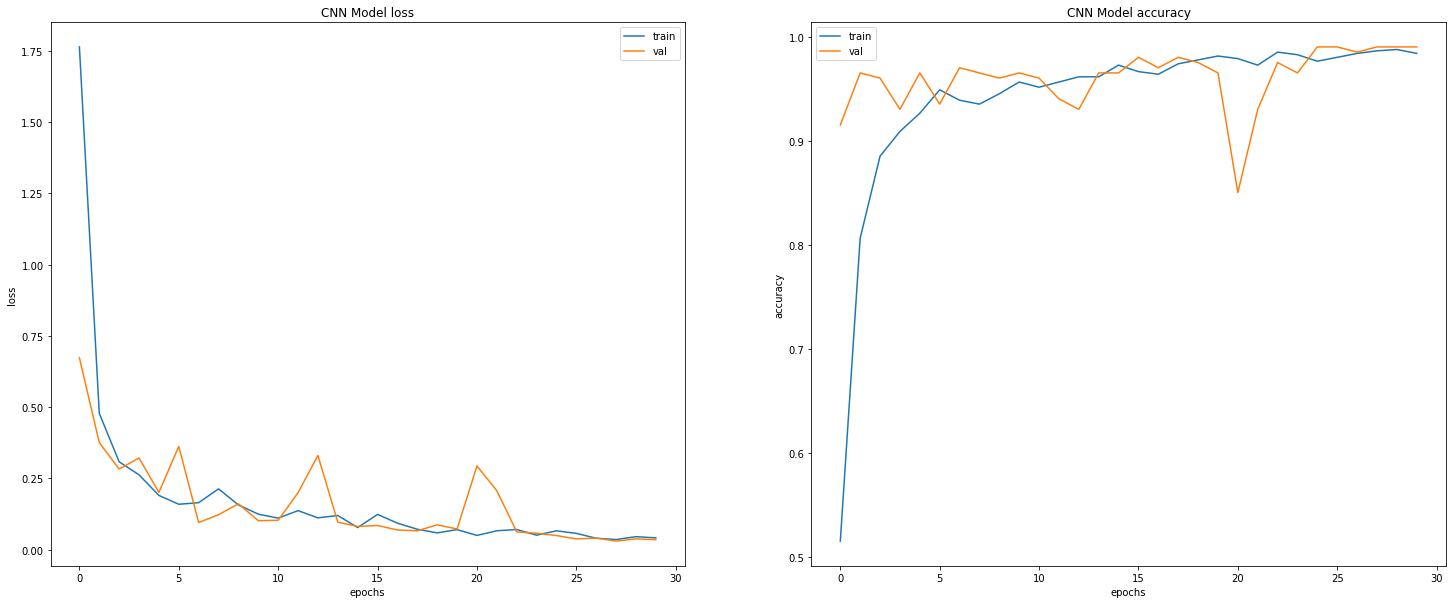

In [33]:
# plot the model accuracy and loss for the training and the validating set.
# CNN Model
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
ax = ax.ravel()

for i, met in enumerate(['loss', 'accuracy']):
    ax[i].plot(model_history4.history[met])
    ax[i].plot(model_history4.history['val_' + met])
    ax[i].set_title('CNN Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

# Confusion Matrix

## 2 conv confusion matrix

1/4 [======>.......................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


4/4 [==============================] - 0s 29ms/step


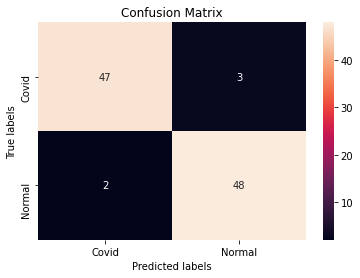

In [34]:
pred  = model.predict_classes(Xtest_norm,verbose= 1)

'''pred_normalized = []
for i in range(len(pred)):
  if(pred[i]<=0.5):
    pred_normalized.append(1)
  else:
    pred_normalized.append(0)
'''
import seaborn as sns

cm = confusion_matrix(ytest, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal']); ax.yaxis.set_ticklabels(['Covid', 'Normal']);


In [35]:
TP = 48
TN = 47
FN = 2
FP = 3
total  = TP+TN+FN+FP

print("sensitivity(Recall)",TP/(TP+FN)*100)
print("Specificity",TN/(TN+FP)*100)
print("Precision",TP/(TP+FP)*100)

# When it's actually yes, how often does it predict yes
# (FP+FN)/total 
# equivalent to 1 minus Accuracy
# also known as "Error Rate"

Misclassification_Rate = (FP+FN)/total
print("Misclassification Rate",Misclassification_Rate)
 
# How often does the yes condition actually occur in our sample?
Prevalence = (FN+TP)/total
print("Prevalence",Prevalence*100)

sensitivity(Recall) 96.0
Specificity 94.0
Precision 94.11764705882352
Misclassification Rate 0.05
Prevalence 50.0


## 3 conv confusion matrix

3/4 [=====================>........] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


4/4 [==============================] - 0s 31ms/step


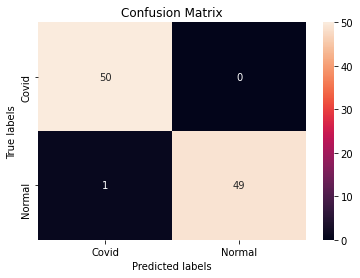

In [36]:
pred  = model2.predict_classes(Xtest_norm,verbose= 1)

'''pred_normalized = []
for i in range(len(pred)):
  if(pred[i]<=0.5):
    pred_normalized.append(1)
  else:
    pred_normalized.append(0)
'''
import seaborn as sns

cm = confusion_matrix(ytest, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal']); ax.yaxis.set_ticklabels(['Covid', 'Normal']);

In [37]:
TP = 49
TN = 49
FN = 1
FP = 1
total  = TP+TN+FN+FP

print("sensitivity(Recall)",TP/(TP+FN)*100)
print("Specificity",TN/(TN+FP)*100)
print("Precision",TP/(TP+FP)*100)

# When it's actually yes, how often does it predict yes
# (FP+FN)/total 
# equivalent to 1 minus Accuracy
# also known as "Error Rate"

Misclassification_Rate = (FP+FN)/total
print("Misclassification Rate",Misclassification_Rate)
 
# How often does the yes condition actually occur in our sample?
Prevalence = (FN+TP)/total
print("Prevalence",Prevalence*100)

sensitivity(Recall) 98.0
Specificity 98.0
Precision 98.0
Misclassification Rate 0.02
Prevalence 50.0


## 4 conv confusion matrix

3/4 [=====================>........] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


4/4 [==============================] - 0s 31ms/step


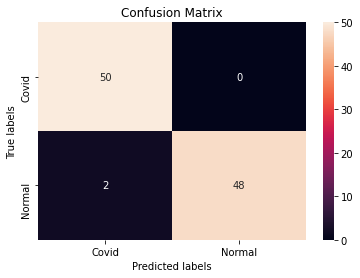

In [38]:
pred  = model3.predict_classes(Xtest_norm,verbose= 1)

'''pred_normalized = []
for i in range(len(pred)):
  if(pred[i]<=0.5):
    pred_normalized.append(1)
  else:
    pred_normalized.append(0)
'''
import seaborn as sns

cm = confusion_matrix(ytest, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal']); ax.yaxis.set_ticklabels(['Covid', 'Normal']);

In [39]:
TP = 49
TN = 48
FN = 1
FP = 2
total  = TP+TN+FN+FP

print("sensitivity(Recall)",TP/(TP+FN)*100)
print("Specificity",TN/(TN+FP)*100)
print("Precision",TP/(TP+FP)*100)

# When it's actually yes, how often does it predict yes
# (FP+FN)/total 
# equivalent to 1 minus Accuracy
# also known as "Error Rate"

Misclassification_Rate = (FP+FN)/total
print("Misclassification Rate",Misclassification_Rate)
 
# How often does the yes condition actually occur in our sample?
Prevalence = (FN+TP)/total
print("Prevalence",Prevalence*100)

sensitivity(Recall) 98.0
Specificity 96.0
Precision 96.07843137254902
Misclassification Rate 0.03
Prevalence 50.0


## 5 conv confusion matrix

1/4 [======>.......................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


4/4 [==============================] - 0s 30ms/step


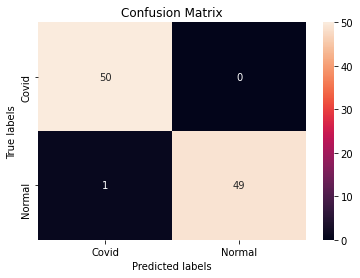

In [40]:
pred  = model4.predict_classes(Xtest_norm,verbose= 1)

'''pred_normalized = []
for i in range(len(pred)):
  if(pred[i]<=0.5):
    pred_normalized.append(1)
  else:
    pred_normalized.append(0)
'''
import seaborn as sns

cm = confusion_matrix(ytest, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal']); ax.yaxis.set_ticklabels(['Covid', 'Normal']);

In [41]:
TP = 48
TN = 48
FN = 2
FP = 2
total  = TP+TN+FN+FP

print("sensitivity(Recall)",TP/(TP+FN)*100)
print("Specificity",TN/(TN+FP)*100)
print("Precision",TP/(TP+FP)*100)

# When it's actually yes, how often does it predict yes
# (FP+FN)/total 
# equivalent to 1 minus Accuracy
# also known as "Error Rate"

Misclassification_Rate = (FP+FN)/total
print("Misclassification Rate",Misclassification_Rate)
 
# How often does the yes condition actually occur in our sample?
Prevalence = (FN+TP)/total
print("Prevalence",Prevalence*100)

sensitivity(Recall) 96.0
Specificity 96.0
Precision 96.0
Misclassification Rate 0.04
Prevalence 50.0


## Saving The Model

In [42]:
model_save_name = 'model.h5'
path = F"/content/{model_save_name}" 
model.save(path)

# Loading the Model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/gdrive/MyDrive/Temp/Model trained without ImageDataGenerator.h5')

# ROC

## 2 conv ROC

In [44]:
# ROC
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(Xtest_norm).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(ytest, y_pred_keras)

# AUC
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

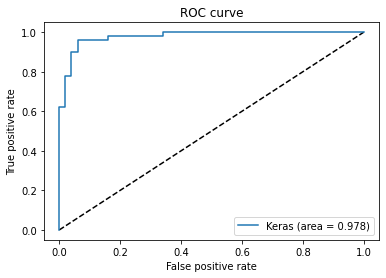

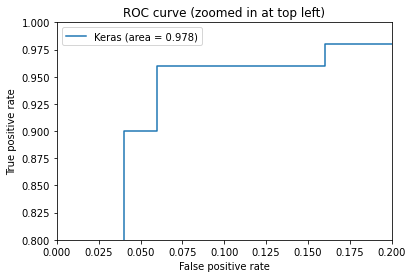

In [45]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

## 3 conv ROC

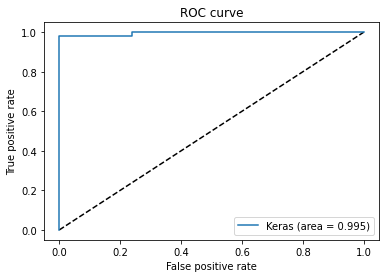

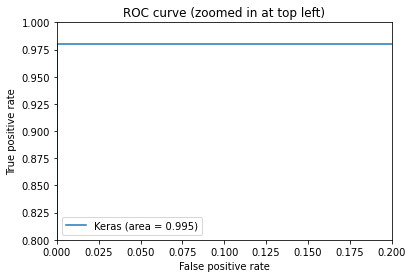

In [46]:
# ROC
from sklearn.metrics import roc_curve
y_pred_keras = model2.predict(Xtest_norm).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(ytest, y_pred_keras)

# AUC
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

## 4 conv ROC

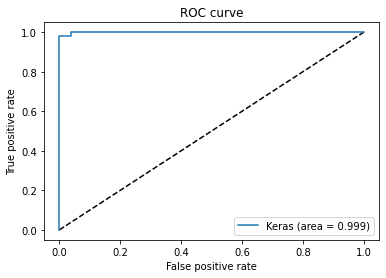

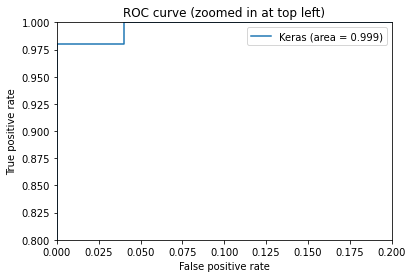

In [47]:
# ROC
from sklearn.metrics import roc_curve
y_pred_keras = model3.predict(Xtest_norm).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(ytest, y_pred_keras)

# AUC
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

## 5 conv ROC

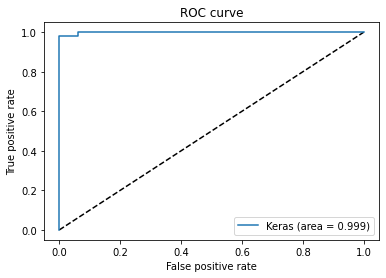

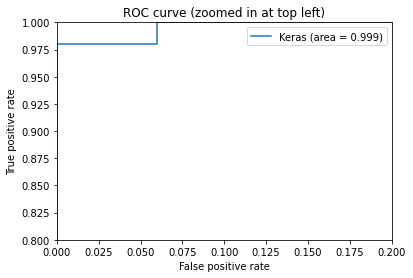

In [48]:
# ROC
from sklearn.metrics import roc_curve
y_pred_keras = model4.predict(Xtest_norm).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(ytest, y_pred_keras)

# AUC
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

# precision-recall curve and f1

## 2 conv precision-recall

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Logistic: f1=0.990 auc=0.978


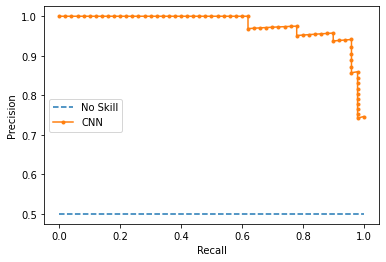

In [49]:



from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

prob = model.predict_proba(Xtest_norm)

lr_precision, lr_recall, _ = precision_recall_curve(ytest, prob)
lr_f1, lr_auc = f1_score(ytest, pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(ytest[ytest==1]) / len(ytest)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='CNN')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 3 conv precision-recall

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Logistic: f1=0.990 auc=0.996


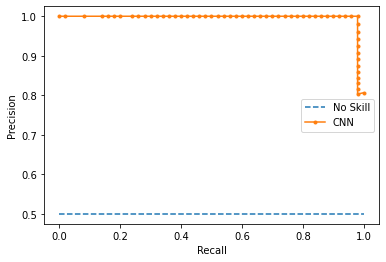

In [50]:



from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

prob = model2.predict_proba(Xtest_norm)

lr_precision, lr_recall, _ = precision_recall_curve(ytest, prob)
lr_f1, lr_auc = f1_score(ytest, pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(ytest[ytest==1]) / len(ytest)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='CNN')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 4 conv precision-recall

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Logistic: f1=0.990 auc=0.999


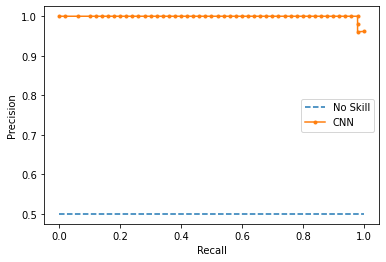

In [51]:



from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

prob = model3.predict_proba(Xtest_norm)

lr_precision, lr_recall, _ = precision_recall_curve(ytest, prob)
lr_f1, lr_auc = f1_score(ytest, pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(ytest[ytest==1]) / len(ytest)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='CNN')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 5 conv precision-recall

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Logistic: f1=0.990 auc=0.999


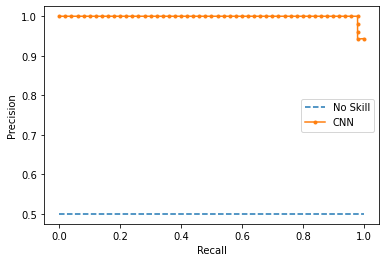

In [52]:



from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

prob = model4.predict_proba(Xtest_norm)

lr_precision, lr_recall, _ = precision_recall_curve(ytest, prob)
lr_f1, lr_auc = f1_score(ytest, pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(ytest[ytest==1]) / len(ytest)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='CNN')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [53]:
from sklearn.metrics import precision_score,f1_score,recall_score
pred  = model.predict_classes(Xtest_norm,verbose= 1)

pr, f1, recal  = precision_score(ytest,pred), f1_score(ytest,pred), recall_score(ytest,pred)
print('Precision = %.3f \nF1 Score = %.3f \nRecall = %.3f' % (pr, f1, recal))

4/4 [==============================] - 0s 26ms/step
Precision = 0.941 
F1 Score = 0.950 
Recall = 0.960


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [54]:
pred  = model2.predict_classes(Xtest_norm,verbose= 0)

pr, f1, recal  = precision_score(ytest,pred), f1_score(ytest,pred), recall_score(ytest,pred)
print('Precision = %.3f \nF1 Score = %.3f \nRecall = %.3f' % (pr, f1, recal))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Precision = 1.000 
F1 Score = 0.990 
Recall = 0.980


In [55]:
pred  = model3.predict_classes(Xtest_norm,verbose= 0)

pr, f1, recal  = precision_score(ytest,pred), f1_score(ytest,pred), recall_score(ytest,pred)
print('Precision = %.3f \nF1 Score = %.3f \nRecall = %.3f' % (pr, f1, recal))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Precision = 1.000 
F1 Score = 0.980 
Recall = 0.960


In [56]:
pred  = model4.predict_classes(Xtest_norm,verbose= 0)

pr, f1, recal  = precision_score(ytest,pred), f1_score(ytest,pred), recall_score(ytest,pred)
print('Precision = %.3f \nF1 Score = %.3f \nRecall = %.3f' % (pr, f1, recal))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Precision = 1.000 
F1 Score = 0.990 
Recall = 0.980


# classification_report

## 2 conv classification report

In [57]:
from sklearn.metrics import classification_report
pred  = model.predict_classes(Xtest_norm,verbose= 0)
print(classification_report(ytest, pred))
print('normal = 1 , covid19 = 0')

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        50
         1.0       0.94      0.96      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100

normal = 1 , covid19 = 0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## 3 conv classification report

In [58]:
from sklearn.metrics import classification_report
pred  = model2.predict_classes(Xtest_norm,verbose= 0)
print(classification_report(ytest, pred))
print('normal = 1 , covid19 = 0')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        50
         1.0       1.00      0.98      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

normal = 1 , covid19 = 0


## 4 conv classification report

In [59]:
from sklearn.metrics import classification_report
pred  = model3.predict_classes(Xtest_norm,verbose= 0)
print(classification_report(ytest, pred))
print('normal = 1 , covid19 = 0')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        50
         1.0       1.00      0.96      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

normal = 1 , covid19 = 0


## 5 conv classification report

In [60]:
from sklearn.metrics import classification_report
pred  = model4.predict_classes(Xtest_norm,verbose= 0)
print(classification_report(ytest, pred))
print('normal = 1 , covid19 = 0')

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        50
         1.0       1.00      0.98      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

normal = 1 , covid19 = 0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# K-Fold cross validation


## 2 conv K fold

In [11]:
# Model With Dropout Layer


def build_model():
  model = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
  model.add(Conv2D(32,(5,5), padding = 'SAME', activation = 'relu', input_shape = (size,size,3)))

  # pooling layer
  model.add(MaxPooling2D(pool_size = (2,2)))

  # place a dropout layer
  model.add(Dropout(0.5)) ## Minimizes the overfitting

  # add another convolutional layer
  model.add(Conv2D(64,(5,5), padding = 'SAME', activation = 'relu'))

  # pooling layer
  model.add(MaxPooling2D(pool_size = (2,2)))

  # place a dropout layer
  model.add(Dropout(0.5))

  # Flatten the image to 1 dimensional array
  model.add(Flatten())

  # add a dense layer : amount of nodes, activation
  model.add(Dense(256, activation = 'relu'))

  # place a dropout layer
  # 0.5 drop out rate is recommended, half input will be dropped at each update
  model.add(Dropout(0.5))
  model.add(Dense(1, activation = 'sigmoid'))

  # compile model
  from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
  model.compile(Adam(lr = 0.001),loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
%%time

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score
import time


estimator= KerasClassifier(build_fn=build_model, epochs=30,verbose = 1)
kfold= KFold(n_splits=5,shuffle=True)
results= cross_val_score(estimator, X_train_norm, y_train, cv=kfold)
print("Accuracies per K-Fold ", results)
results.mean()

Epoch 1/30
20/20 [==============================] - 36s 88ms/step - loss: 15.5463 - accuracy: 0.6927
Epoch 2/30
20/20 [==============================] - 2s 83ms/step - loss: 0.2497 - accuracy: 0.9058
Epoch 3/30
20/20 [==============================] - 2s 85ms/step - loss: 0.1962 - accuracy: 0.9340
Epoch 4/30
20/20 [==============================] - 2s 85ms/step - loss: 0.1917 - accuracy: 0.9380
Epoch 5/30
20/20 [==============================] - 2s 84ms/step - loss: 0.1422 - accuracy: 0.9464
Epoch 6/30
20/20 [==============================] - 2s 84ms/step - loss: 0.1140 - accuracy: 0.9584
Epoch 7/30
20/20 [==============================] - 2s 83ms/step - loss: 0.1340 - accuracy: 0.9490
Epoch 8/30
20/20 [==============================] - 2s 84ms/step - loss: 0.1105 - accuracy: 0.9628
Epoch 9/30
20/20 [==============================] - 2s 83ms/step - loss: 0.0847 - accuracy: 0.9637
Epoch 10/30
20/20 [==============================] - 2s 84ms/step - loss: 0.0635 - accuracy: 0.9814
Epoch 1

In [ ]:
print("Accuracies per K-Fold ", results)
results.mean()

In [ ]:
results.max()

In [ ]:
results.min()

In [ ]:
results.std()

## 3 conv K fold

In [ ]:
# Model With Dropout Layer


def build_model2():
  model2 = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
  model2.add(Conv2D(32,(5,5),padding = 'SAME', activation = 'relu', input_shape = (size,size,3)))

# pooling layer
  model2.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model2.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
  model2.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
  model2.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model2.add(Dropout(0.5))

# add another convolutional layer
  model2.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
  model2.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model2.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
  model2.add(Flatten())

# add a dense layer : amount of nodes, activation
  model2.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
  model2.add(Dropout(0.5))
  model2.add(Dense(1, activation = 'sigmoid'))
  # compile model
  from tensorflow.keras.optimizers import Adam # Adam is optimizer
  # Loss function definition
  model2.compile(Adam(lr = 0.001),loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model2



In [ ]:
%%time
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score
import time


estimator= KerasClassifier(build_fn=build_model2, epochs=30,verbose = 1)
kfold= KFold(n_splits=5,shuffle=True)
results= cross_val_score(estimator, X_train_norm, y_train, cv=kfold)
print("Accuracies per K-Fold ", results)
results.mean()

In [ ]:
print("Accuracies per K-Fold ", results)
results.mean()

In [ ]:
results.max()

In [ ]:
results.min()

In [ ]:
results.std()

## 4 conv K fold

In [ ]:
# Model With Dropout Layer

def build_model3():
  model3 = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
  model3.add(Conv2D(32,(5,5),padding = 'SAME', activation = 'relu', input_shape = (size,size,3)))

# pooling layer
  model3.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model3.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
  model3.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
  model3.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model3.add(Dropout(0.5))

# add another convolutional layer
  model3.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
  model3.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model3.add(Dropout(0.5))

# add another convolutional layer
  model3.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
  model3.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model3.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
  model3.add(Flatten())

# add a dense layer : amount of nodes, activation
  model3.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
  model3.add(Dropout(0.5))
  model3.add(Dense(1, activation = 'sigmoid'))
  # compile model
  from tensorflow.keras.optimizers import Adam # Adam is optimizer
  # Loss function definition
  model3.compile(Adam(lr = 0.001),loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model3



In [ ]:
%%time
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score
import time


estimator= KerasClassifier(build_fn=build_model3, epochs=30,verbose = 1)
kfold= KFold(n_splits=5,shuffle=True)
results= cross_val_score(estimator, X_train_norm, y_train, cv=kfold)
print("Accuracies per K-Fold ", results)
results.mean()

In [ ]:
print("Accuracies per K-Fold ", results)
results.mean()

In [ ]:
results.max()

In [ ]:
results.min()

In [ ]:
results.std()

## 5 conv K fold

In [ ]:
# Model With Dropout Layer

def build_model4():
  model4 = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
  model4.add(Conv2D(32,(5,5),padding = 'SAME', activation = 'relu', input_shape = (size,size,3)))

# pooling layer
  model4.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model4.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
  model4.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
  model4.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model4.add(Dropout(0.5))

# add another convolutional layer
  model4.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
  model4.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model4.add(Dropout(0.5))

# add another convolutional layer
  model4.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
  model4.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model4.add(Dropout(0.5))

  # add another convolutional layer
  model4.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
  model4.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model4.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
  model4.add(Flatten())

# add a dense layer : amount of nodes, activation
  model4.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
  model4.add(Dropout(0.5))
  model4.add(Dense(1, activation = 'sigmoid'))
  # compile model
  from tensorflow.keras.optimizers import Adam # Adam is optimizer
  # Loss function definition
  model4.compile(Adam(lr = 0.001),loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model4



In [ ]:
%%time
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score
import time


estimator= KerasClassifier(build_fn=build_model4, epochs=30,verbose = 1)
kfold= KFold(n_splits=5,shuffle=True)
results= cross_val_score(estimator, X_train_norm, y_train, cv=kfold)
print("Accuracies per K-Fold ", results)
results.mean()

In [ ]:
print("Accuracies per K-Fold ", results)
results.mean()

In [ ]:
results.max()

In [ ]:
results.min()

In [ ]:
results.std()

In [ ]:
%%time
from sklearn.model_selection import cross_val_predict,
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(estimator, Xtest_norm, ytest, cv=kfold)
conf_mat = confusion_matrix(ytest, y_pred)